mar12014_1_15600.nc
mar12014_2_15600.nc
mar12014_3_15600.nc
mar12014_4_15600.nc
mar12014_5_15600.nc
mar12014_6_15600.nc
mar12014_7_15600.nc
mar12014_8_15600.nc
mar12014_9_15600.nc
mar12014_10_15600.nc


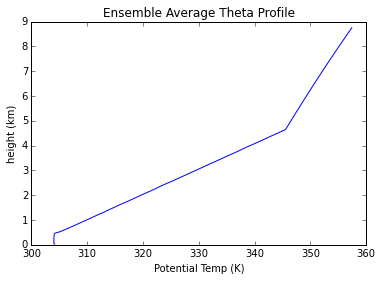

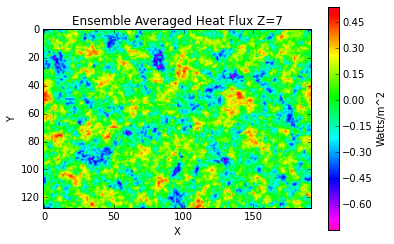

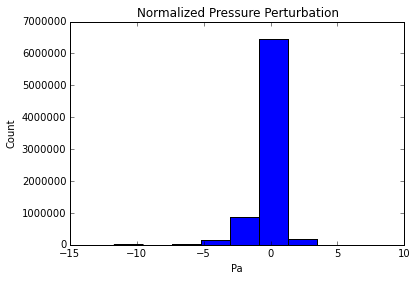

In [3]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

Calculates ensemble averaged theta profile & vertical heat flux tru the bottom layer
Calculates histogram of one members normalized pressure perturbation
"""


from netCDF4 import Dataset
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import urllib.request


root='http://clouds.eos.ubc.ca/~phil/docs/atsc500/dryles'
for i in np.arange(1,11,dtype=np.int):
    the_name='mar12014_{:d}_15600.nc'.format(i)
    print(the_name)
    url='{}/{}'.format(root,the_name)
    urllib.request.urlretrieve(url,the_name)

    with Dataset(the_name,'r') as nc_in:
        T=nc_in.variables['TABS'][...]
        T=T.squeeze()
        P=nc_in.variables['p'][...]
        P=P.squeeze()
        Z=nc_in.variables['z'][...]
        Z=Z.squeeze()
        W=nc_in.variables['W'][...]
        W=W.squeeze()
        Pert=nc_in.variables['PP'][...]
        Pert=Pert.squeeze()
        if i == 1:
            Theta_av=np.zeros(shape=(T.shape))
            Heatflux_av=np.zeros(shape=(T.shape))
#            
#       Calculates potential temperature
#            
        Theta=T*(1000/P[:,np.newaxis,np.newaxis])**0.286
        Theta_av=Theta_av+Theta
#        
#       Calculates Kinematic heat flux
#        
        Theta_Bar=Theta.mean(axis=0)
        W_Bar=W.mean(axis=0)
        ThetaPrime=Theta-Theta_Bar[np.newaxis,:]
        WPrime=W-W_Bar[np.newaxis,:]
        Heatflux=ThetaPrime*WPrime
#        
#       Convert from kinematic flux using Stull2.6.1b
#        
        Rd = 287
        cp = 1004
        density = P[:,np.newaxis,np.newaxis]/(Rd*T)
        Heatflux = 1/(density*cp/Heatflux)
        Heatflux_av=Heatflux+Heatflux_av
#        
#       Pressure Perturbation
##        
#        Pert_av=Pert.mean(axis=2).mean(axis=1).mean(axis=0)
#        Pert=Pert-Pert_av

Theta_av=Theta_av/i
Heatflux_av=Heatflux_av/i
#
#   Plot Theta Profile
#
pl = plt.figure(1)
ax1 = pl.add_subplot(1,1,1)
ax1.plot(Theta_av[:,50,51],Z/1000)
ax1.set(xlabel='Potential Temp (K)',ylabel='height (km)',title = 'Ensemble Average Theta Profile')
#
#   Plot Heat Flux
#
pl = plt.figure(2)
ax1 = pl.add_subplot(1,1,1)
im = ax1.imshow(Heatflux_av[7,:,:],cmap=cm.gist_rainbow_r)
ax1.set(xlabel='X',ylabel='Y',title='Ensemble Averaged Heat Flux Z=7')
cb1 = plt.colorbar(im)
cb1.set_label('Watts/m^2')
# 
#   Histogram of Pressure Peturbations
#
pl = plt.figure(3)
ax1 = pl.add_subplot(1,1,1)
Flat_Pert=np.ndarray.flatten(Pert)
Flat_Pert=(Flat_Pert-np.mean(Flat_Pert))/np.std(Flat_Pert)
ax1.hist(Flat_Pert)
ax1.set(xlabel='Pa',ylabel='Count',title='Normalized Pressure Perturbation')